In [65]:
import pandas as pd # for working on dataset
import numpy as np # for using numpy library
import matplotlib.pyplot as plt # for visualizing data in a graphical form
import quandl # for importing stock dataset

Importing the stock dataset of Wipro from 2010 using the quandl library.

In [66]:
data = quandl.get("NSE/WIPRO", start_date="2010-01-01")


In [67]:
data.shape

(2237, 7)

In [68]:
data.head(10) # displaying the first 10 rows of the dataset

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-01-04,685.00,697.0,675.95,696.35,693.80,767166.0,5301.77
2010-01-05,696.30,708.0,693.55,707.85,704.75,1120433.0,7835.49
2010-01-06,706.00,710.0,687.00,693.00,690.50,1029382.0,7138.37
2010-01-07,695.00,695.5,675.00,678.00,678.25,1031096.0,7005.77
2010-01-08,679.00,680.0,666.00,666.40,668.05,642789.0,4304.71
2010-01-11,667.00,681.1,656.25,664.00,661.40,1277525.0,8510.66
2010-01-12,672.00,703.8,672.00,693.00,693.80,2338854.0,16181.34
2010-01-13,696.95,720.0,688.45,718.10,715.60,2538808.0,17997.41
2010-01-14,719.80,752.7,708.20,736.00,741.10,4383044.0,32209.21


Plotting the graph to show the 'Close' trend over the years.

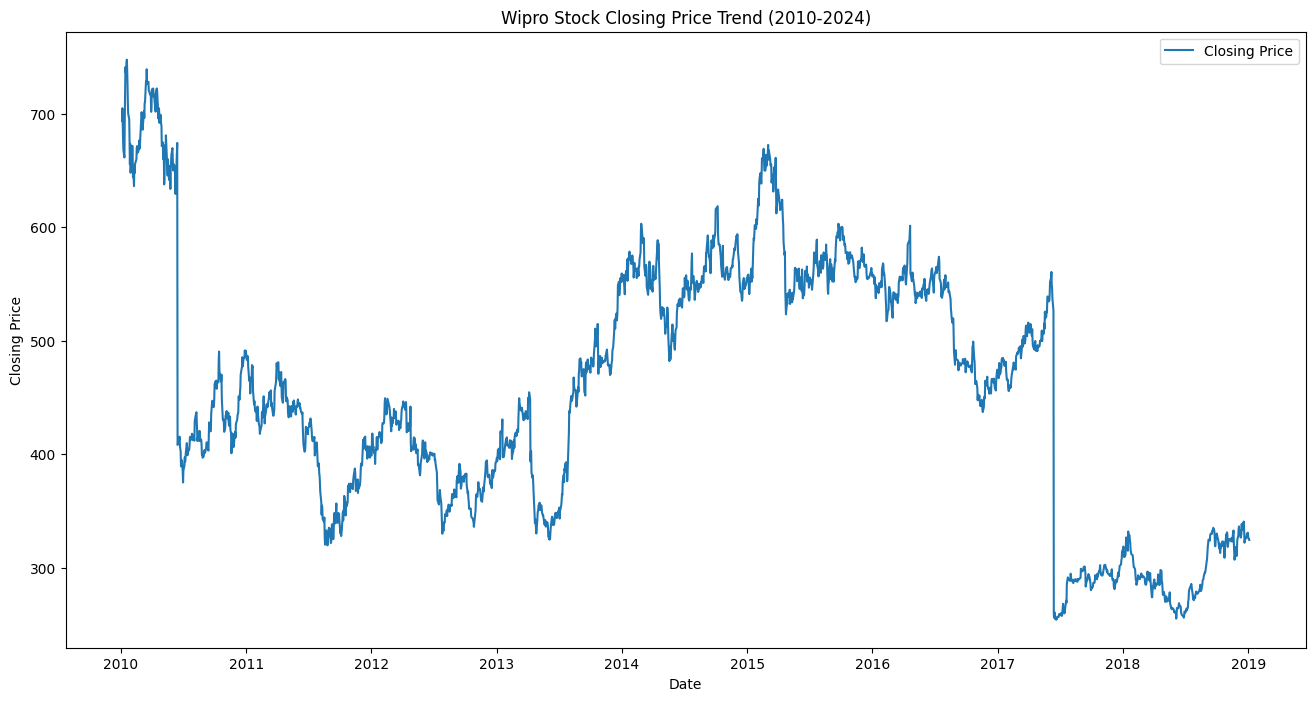

In [84]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Closing Price')
plt.title('Wipro Stock Closing Price Trend (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


**Classification Problem of 'buying' or 'selling' a stock**

In [70]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

Predicting whether the customer should buy or sell a stock.

In [71]:
x = data[['Open - Close', 'High - Low']]
x.head()

,Open - Close,High - Low
Date,,
2010-01-04,-8.80,21.05
2010-01-05,-8.45,14.45
2010-01-06,15.50,23.00
2010-01-07,16.75,20.50
2010-01-08,10.95,14.00


Our Intension is to display '1' for the buy signal and '-1' for the sell signal.

In [72]:
y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
y

array([ 1, -1, -1, ..., -1, -1, -1])

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv = 5)

model.fit(x_train, y_train)

accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('Train data accuracy : %.2f' %accuracy_train)
print('Test data accuracy : %.2f' %accuracy_test)

Train data accuracy : 0.75
Test data accuracy : 0.52


In [75]:
prediction_classification = model.predict(x_test)

In [76]:
actual_predicted_data = pd.DataFrame({'Actual Value' : y_test, 'Predicted Value' : prediction_classification})
actual_predicted_data.head(10)

,Actual Value,Predicted Value
0,1,1
1,-1,1
2,-1,-1
3,1,1
4,-1,1
5,1,1
6,1,1
7,1,1
8,-1,-1
9,1,-1


**Regression Problem**

In [77]:
y = data['Close']
y

Date
2010-01-04    693.80
2010-01-05    704.75
2010-01-06    690.50
2010-01-07    678.25
2010-01-08    668.05
               ...  
2018-12-31    330.85
2019-01-01    326.65
2019-01-02    325.55
2019-01-03    325.50
2019-01-04    324.45
Name: Close, Length: 2237, dtype: float64

In [78]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.25)

params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv = 5)

model_reg.fit(x_train_reg, y_train_reg)
predictions = model_reg.predict(x_test_reg)

In [79]:
predictions

array([518.13571429, 500.78214286, 367.31071429, 479.8       ,
       392.53571429, 528.21071429, 441.22142857, 447.99642857,
       445.975     , 442.61785714, 488.81428571, 477.53214286,
       465.74285714, 481.225     , 419.70357143, 479.56785714,
       359.08928571, 425.15357143, 448.28928571, 443.95      ,
       424.57857143, 469.55      , 369.91428571, 547.72142857,
       470.05714286, 528.93571429, 369.41428571, 497.36785714,
       450.35714286, 449.50357143, 477.26428571, 457.73571429,
       463.86428571, 430.92857143, 406.40714286, 429.36428571,
       468.93571429, 409.15714286, 443.86785714, 379.59285714,
       383.87142857, 458.75      , 432.40357143, 493.25      ,
       437.77857143, 459.83571429, 515.31785714, 498.46428571,
       311.19285714, 453.84285714, 593.01428571, 500.29285714,
       524.48928571, 314.81428571, 508.73214286, 421.24285714,
       474.50714286, 477.70714286, 462.97142857, 457.36428571,
       515.95714286, 431.775     , 433.70357143, 425.62

In [80]:
# rmse value
rms = np.sqrt(np.mean(np.power((np.array(y_test_reg) - np.array(predictions)), 2)))
rms

100.03569866094075

In [81]:
valid = pd.DataFrame({'Actual Close' : y_test_reg, 'Predicted Close' : predictions})
valid.head(10)

,Actual Close,Predicted Close
Date,,
2011-01-17,466.75,518.135714
2012-02-24,437.90,500.782143
2012-04-17,421.20,367.310714
2014-03-26,545.55,479.800000
2012-12-27,385.50,392.535714
2010-06-01,658.30,528.210714
2016-09-12,480.40,441.221429
2010-10-11,463.65,447.996429
2018-04-11,285.70,445.975000
